In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]

'0'

In [3]:
size = 256
import cv2
import os
trainImgs = []
trainMaps = []
images = []
for file in os.listdir("maps/train"):
    image = cv2.imread(f"maps/train/{file}")
    image = cv2.resize(image, (2*size,size))
    images.append(image)
    img, map = image[:, :size], image[:, size:]
    trainImgs.append(img)
    trainMaps.append(map)
trainMaps = np.array(trainMaps)
trainImgs = np.array(trainImgs)

print('loaded training images',len(trainMaps))
testImgs = []
testMaps = []
for file in os.listdir("maps/val"):
    image = cv2.imread(f"maps/val/{file}")
    image = cv2.resize(image, (2*size,size))
    images.append(image)
    img, map = image[:, :size], image[:, size:]
    testImgs.append(img)
    testMaps.append(map)
testMaps = np.array(testMaps)
testImgs = np.array(testImgs)



print('loaded test images',len(testMaps))


loaded training images 1096
loaded test images 1098


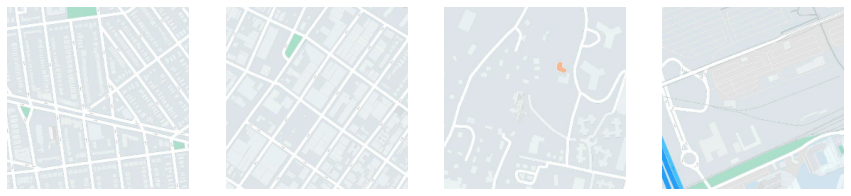

In [4]:
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(15, 15))
n = 4
x = 1
for i in range(n):
    ax = plt.subplot(2, n, x)
    x = x + 1
    plt.imshow(trainMaps[i])
    plt.axis("off")
plt.show()

In [5]:
def show_images(testSamples,txt):
    #testSamples = trainMaps
    resultSamples = autoencoder.predict(testSamples[:10])
    n = 4
    plt.figure(figsize=(15, 15))

    print('Original',txt,'images')
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(testSamples[i].reshape((size,size,3)))
        #plt.gray()
        plt.axis("off")
    plt.show()


    plt.figure(figsize=(15, 15))
    print('Reconstructed',txt,'images')
    for i in range(n):
        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(resultSamples[i].reshape((size,size,3)))
        plt.axis("off")
    #plt.savefig('transpose.png')
    plt.show()

In [6]:
trainMaps = np.array(trainMaps)
trainMaps = trainMaps.astype('float32') / 255.0
testMaps = testMaps.astype('float32') / 255.0
print("images",trainMaps.shape)

flatMaps = trainMaps.reshape(len(trainMaps),-1)
print("flat",flatMaps.shape)


images (1096, 256, 256, 3)
flat (1096, 196608)


In [9]:
#import importlib
#importlib.reload(autoencoders)
import autoencoders
input_size = size*size*3
code_size = 500

#autoencoder = autoencoders.flat2(input_size,code_size)
autoencoder = autoencoders.upsampling_model((size,size,3))
#autoencoder = autoencoders.transpose_model((size,size,3))

autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#autoencoder.fit(trainMaps, trainMaps, epochs=10, batch_size=16)
#autoencoder.fit(flatMaps, flatMaps, epochs=10)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 16)      4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 8)         1160      
_________________________________________________________________
encoded (MaxPooling2D)       (None, 32, 32, 8)         0   

35/35 [==============================] - 4s 105ms/step - loss: 0.5403
Epoch 0
Original training images


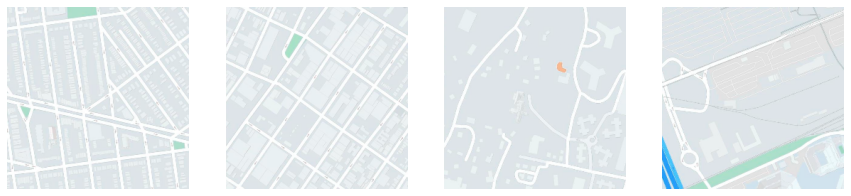

Reconstructed training images


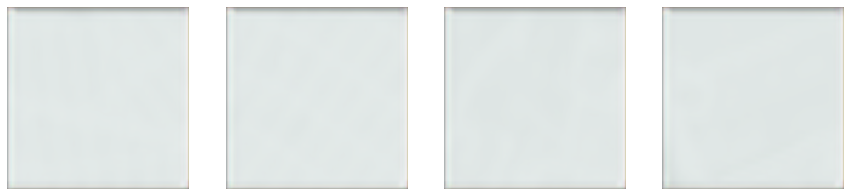

Original test images


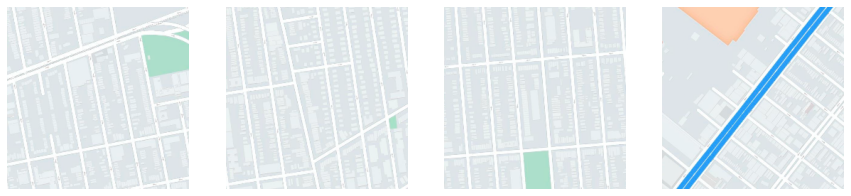

Reconstructed test images


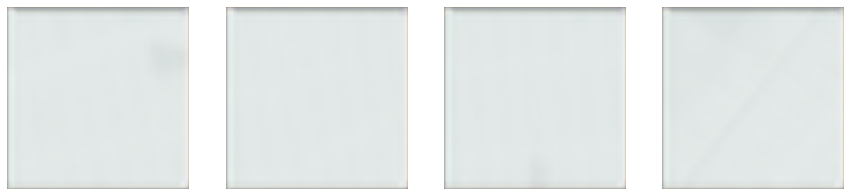

35/35 [==============================] - 4s 106ms/step - loss: 0.3392
Epoch 10
Original training images


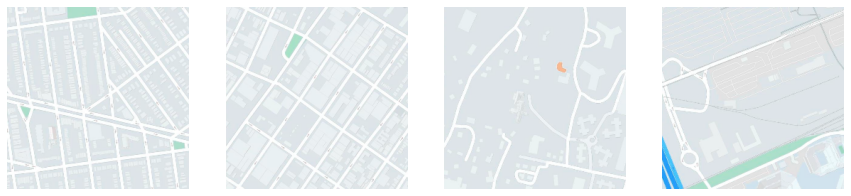

Reconstructed training images


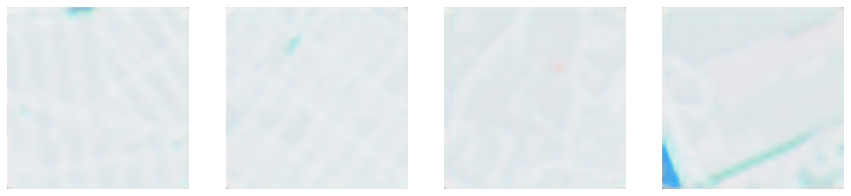

Original test images


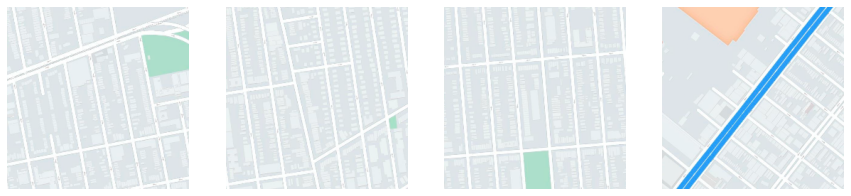

Reconstructed test images


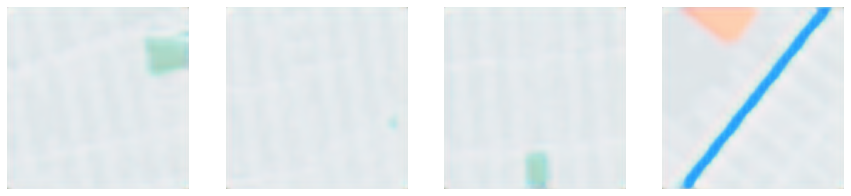

35/35 [==============================] - 4s 107ms/step - loss: 0.3378
Epoch 20
Original training images


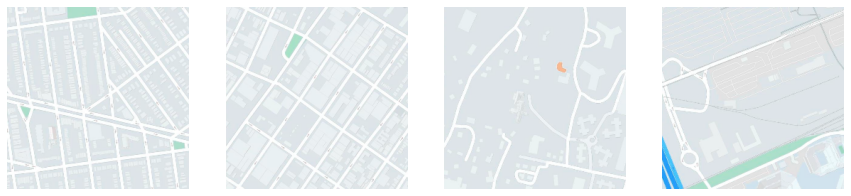

Reconstructed training images


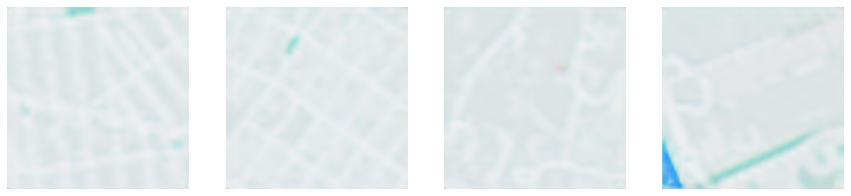

Original test images


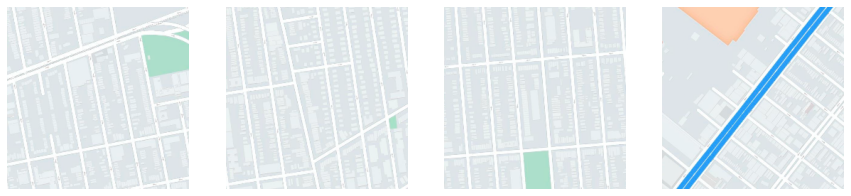

Reconstructed test images


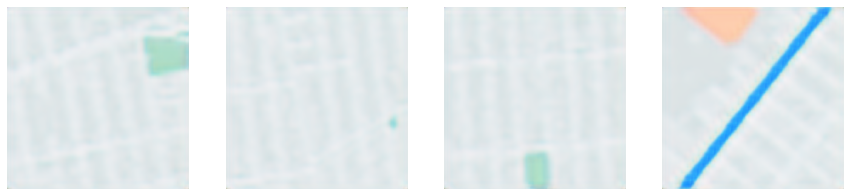

35/35 [==============================] - 4s 105ms/step - loss: 0.3373
Epoch 30
Original training images


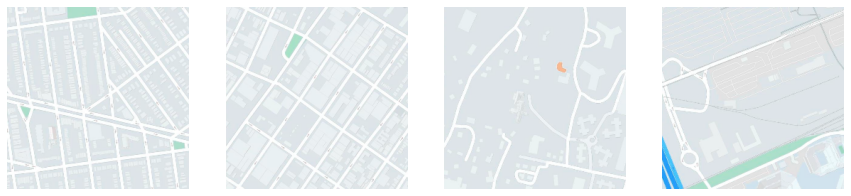

Reconstructed training images


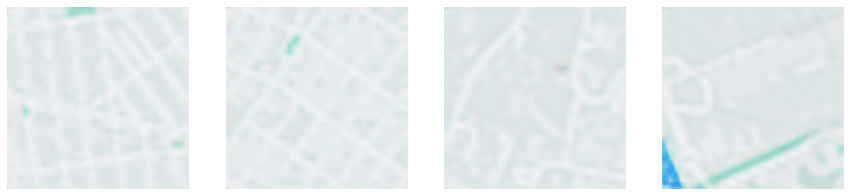

Original test images


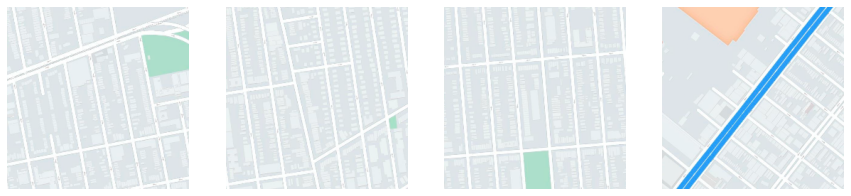

Reconstructed test images


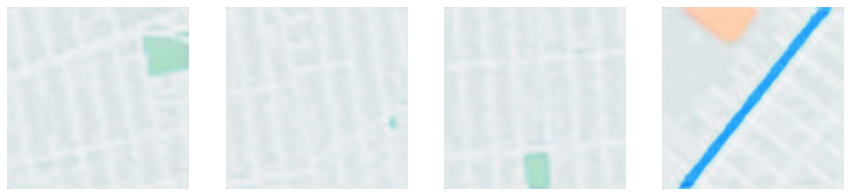

35/35 [==============================] - 4s 107ms/step - loss: 0.3367
Epoch 40
Original training images


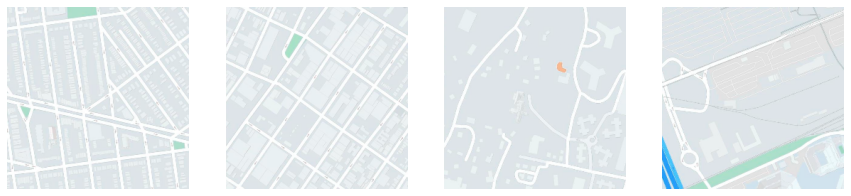

Reconstructed training images


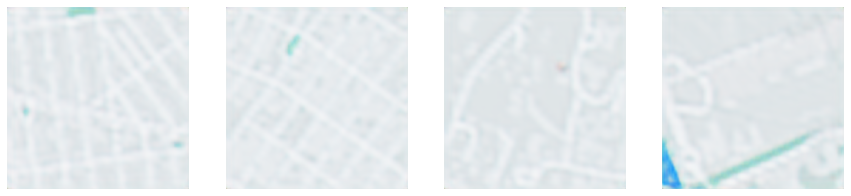

Original test images


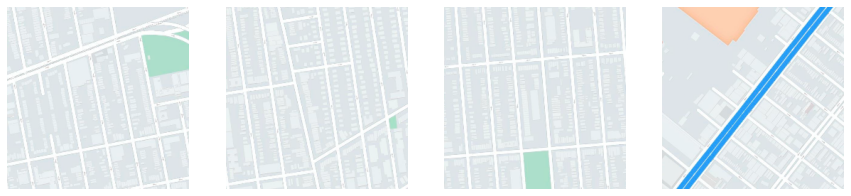

Reconstructed test images


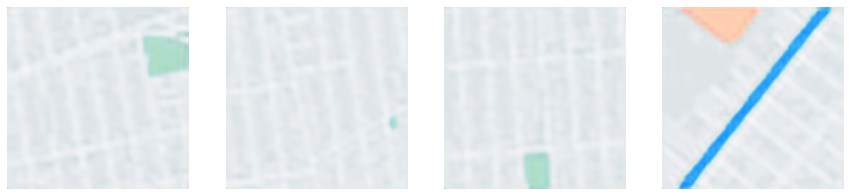

35/35 [==============================] - 4s 105ms/step - loss: 0.3364
Epoch 50
Original training images


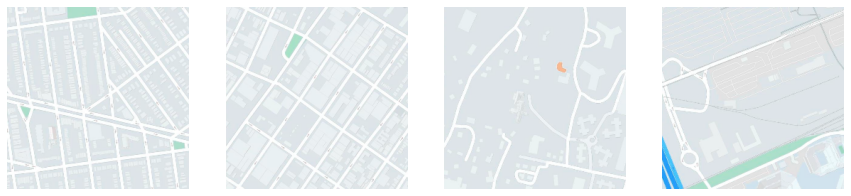

Reconstructed training images


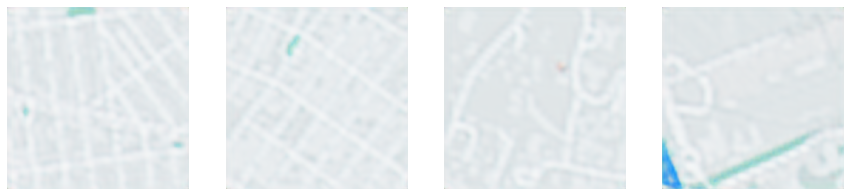

Original test images


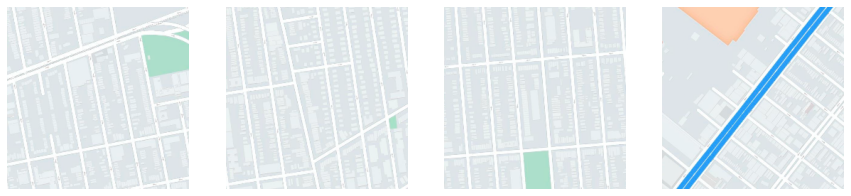

Reconstructed test images


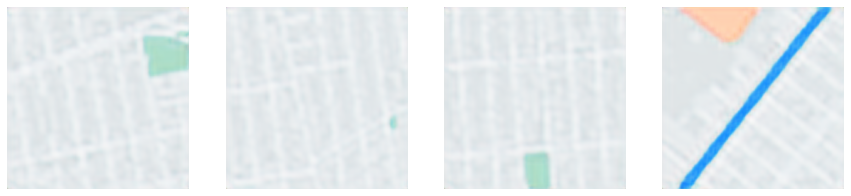

35/35 [==============================] - 4s 107ms/step - loss: 0.3361
Epoch 60
Original training images


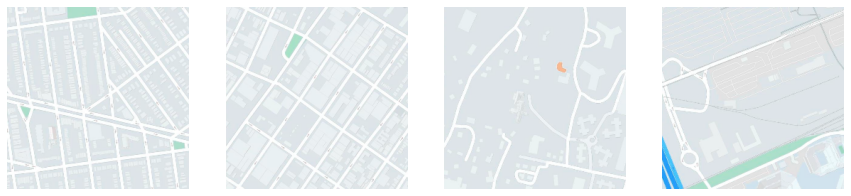

Reconstructed training images


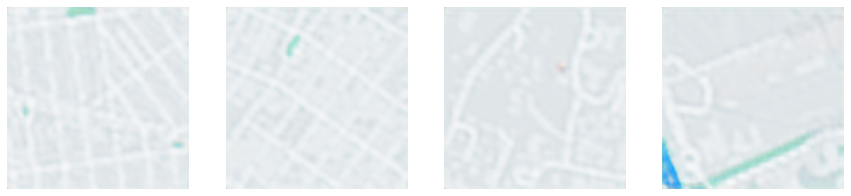

Original test images


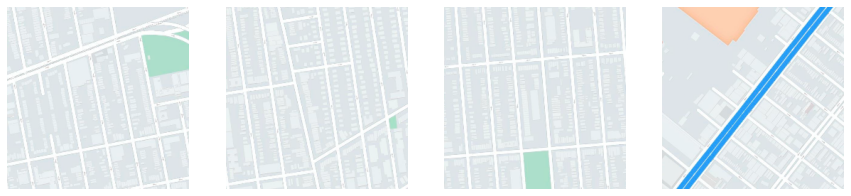

Reconstructed test images


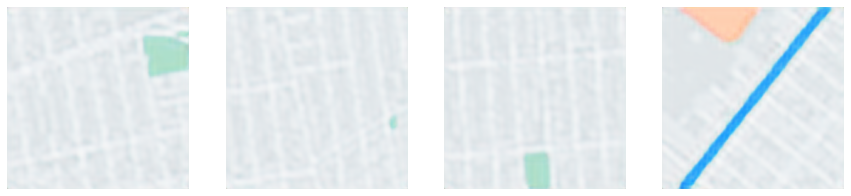

35/35 [==============================] - 4s 110ms/step - loss: 0.3358
Epoch 70
Original training images


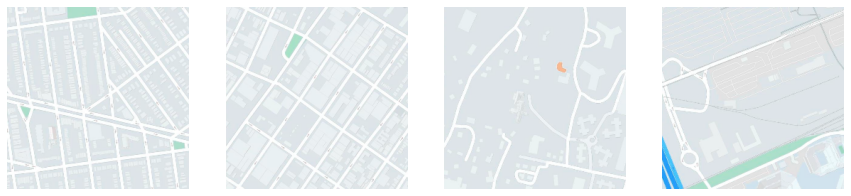

Reconstructed training images


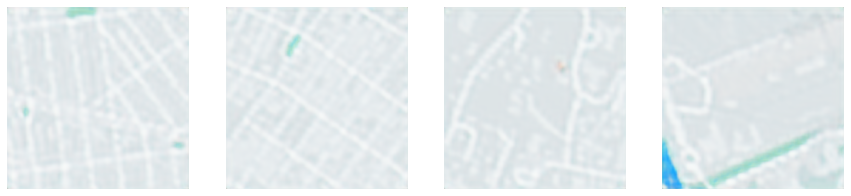

Original test images


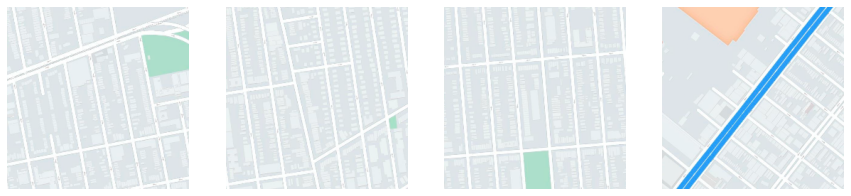

Reconstructed test images


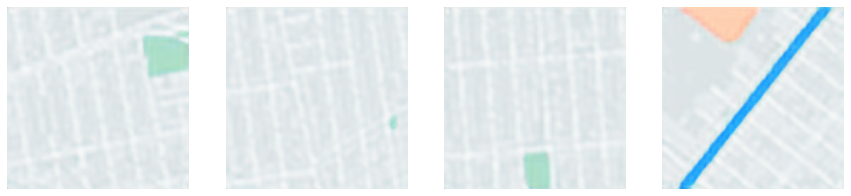

35/35 [==============================] - 4s 106ms/step - loss: 0.3356
Epoch 80
Original training images


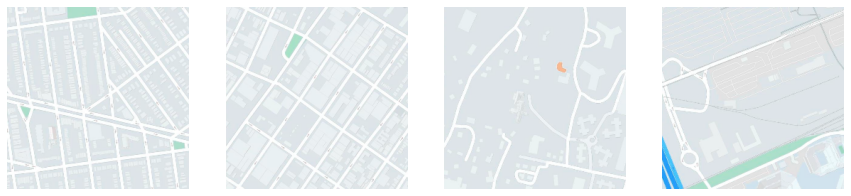

Reconstructed training images


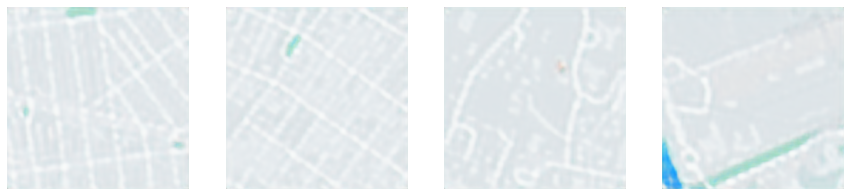

Original test images


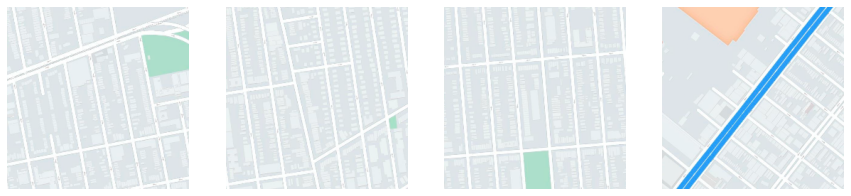

Reconstructed test images


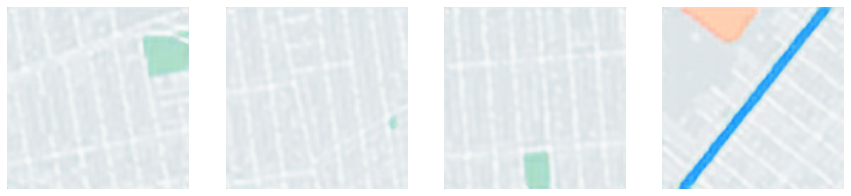

35/35 [==============================] - 4s 106ms/step - loss: 0.3350
Epoch 90
Original training images


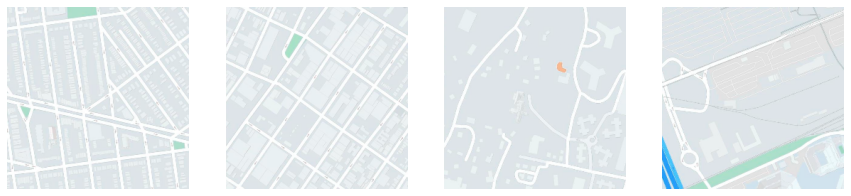

Reconstructed training images


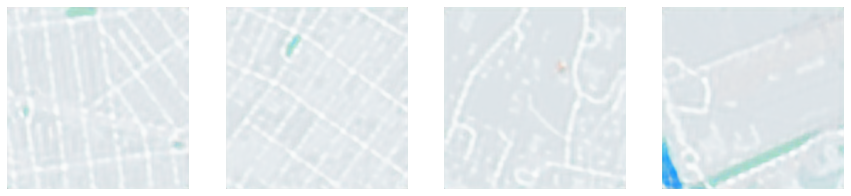

Original test images


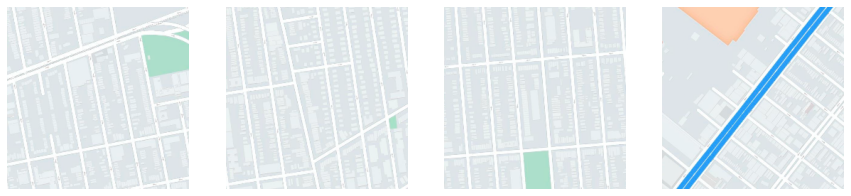

Reconstructed test images


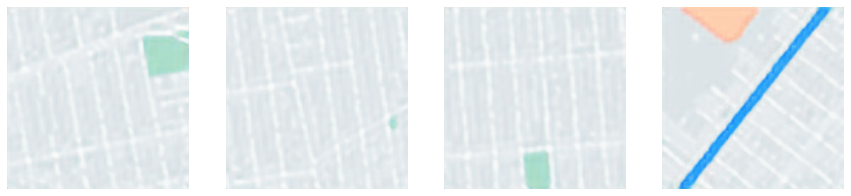

35/35 [==============================] - 4s 106ms/step - loss: 0.3347


In [10]:
#autoencoder.fit(trainSamples_noisy, trainSamples, epochs=5)
for epoch in range(101):
    autoencoder.fit(trainMaps, trainMaps, epochs=1)
    ##autoencoder.fit(flatMaps, flatMaps, epochs=1)
    if epoch%10==0:
        print("Epoch",epoch)
        show_images(trainMaps,'training')
        show_images(testMaps,'test')
    

Original training images


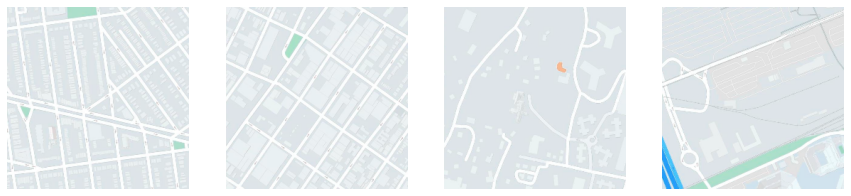

Reconstructed training images


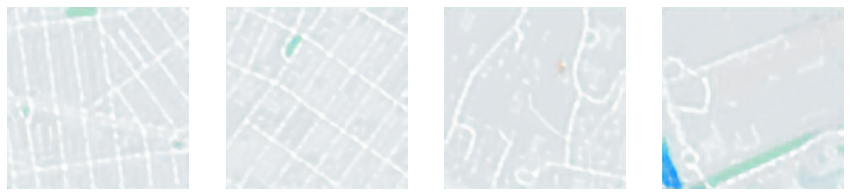

Original test images


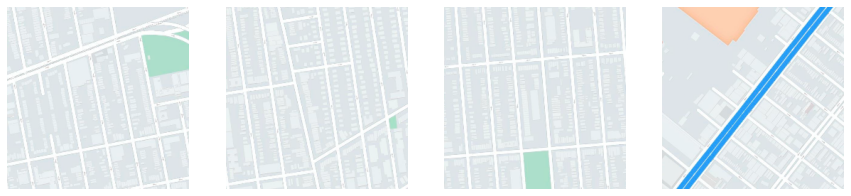

Reconstructed test images


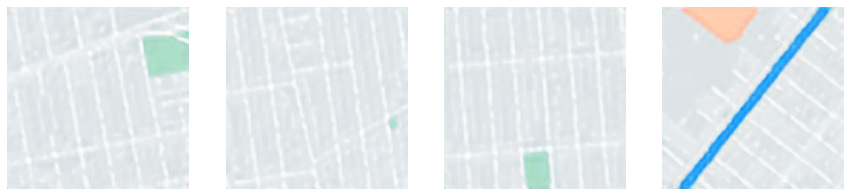

In [11]:
show_images(trainMaps,'training')
show_images(testMaps,'test')